In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sam = pd.read_csv("/pathname/selfassessment_mannequin_sam.csv")

In [4]:
#Missing Data
sam.isnull().sum() / len(sam)

#Remove sam_ts (0.96 missing), redcap_repeat_instrument (all same), sam944_status, sam944_serializedresult, selfassessment_mannequin_sam_complete


participant_id                           0.000000
record_id                                0.000000
redcap_repeat_instrument                 0.000000
redcap_repeat_instance                   0.000000
work24                                   0.233849
sam1                                     0.374122
sam2                                     0.000000
sam3                                     0.374122
sam4                                     0.000000
sam5                                     0.374122
sam6                                     0.000000
sam7                                     0.374060
sam8                                     0.000000
sam_ts                                   0.960331
sam944_uuid                              0.000000
sam944_startdate                         0.000000
sam944_enddate                           0.000000
sam944_scheduledate                      0.000187
sam944_status                            0.000000
sam944_serializedresult                  0.000249


In [5]:
sam.dtypes

participant_id                            object
record_id                                  int64
redcap_repeat_instrument                  object
redcap_repeat_instance                     int64
work24                                   float64
sam1                                     float64
sam2                                       int64
sam3                                     float64
sam4                                       int64
sam5                                     float64
sam6                                       int64
sam7                                     float64
sam8                                       int64
sam_ts                                    object
sam944_uuid                               object
sam944_startdate                          object
sam944_enddate                            object
sam944_scheduledate                       object
sam944_status                              int64
sam944_serializedresult                   object
selfassessment_manne

In [6]:
sam.drop(columns = ['sam_ts', 'redcap_repeat_instrument', 'sam944_status','sam944_serializedresult', 'selfassessment_mannequin_sam_complete', 'sam944_uuid', 'sam944_startdate', 'sam944_enddate', 'sam944_scheduledate'], inplace = True)
sam

,participant_id,record_id,redcap_repeat_instance,work24,sam1,sam2,sam3,sam4,sam5,sam6,sam7,sam8
0,U-5C245D4USLA4KUFTXP4F,1,1,NaN,6.0,4,6.0,3,6.0,3,6.0,3
1,U-5C245D4USLA4KUFTXP4F,1,2,NaN,4.0,3,3.0,4,2.0,3,2.0,3
2,U-5C245D4USLA4KUFTXP4F,1,3,NaN,3.0,2,4.0,2,2.0,3,2.0,3
3,U-5C245D4USLA4KUFTXP4F,1,4,NaN,2.0,2,3.0,3,2.0,3,3.0,3
4,U-5C245D4USLA4KUFTXP4F,1,5,NaN,3.0,4,4.0,4,1.0,4,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
16078,U-32WDZGP75GXDWDXS9FZP,385,16,1.0,2.0,3,2.0,4,2.0,2,3.0,2
16079,U-32WDZGP75GXDWDXS9FZP,385,17,0.0,NaN,2,NaN,4,NaN,5,NaN,4
16080,U-32WDZGP75GXDWDXS9FZP,385,18,1.0,2.0,5,2.0,4,2.0,4,3.0,2
16081,U-32WDZGP75GXDWDXS9FZP,385,19,1.0,2.0,4,2.0,4,2.0,4,3.0,3


In [7]:
#sam8 = stress level
#1 = Very Stressed, 2 = Stressed, 3 = Neutral, 4 = Calm, 5 = Very Calm, 6 = No Answer

In [8]:
#stress_count by partipant_id
stress_by_person = pd.DataFrame(sam.loc[(sam['sam8'] == 1)|(sam['sam8'] == 2)].groupby('participant_id')['sam8'].count().reset_index(name = "stress_count"))
stress_by_person

,participant_id,stress_count
0,U-11YJYE852QXSR8AUC2W1,4
1,U-12HDU523T7TSN18MQNTU,9
2,U-1AFJWXDX3WVA8ZEMEL35,1
3,U-1D2T72SSE7SWAZ6Y3WWR,2
4,U-1DV1Y8WJ5MD3WEFER4M8,5
...,...,...
296,U-ZPHTENESZBB6ML9ZSQPG,1
297,U-ZS8GKJ1KQC5YLY52RV2K,2
298,U-ZTNYX2MYN87VDK2LLVCJ,1
299,U-ZUY395L4QK8TQXMLTJNH,8


In [9]:
energy = pd.DataFrame(sam.loc[(sam['sam4'] == 1)|(sam['sam8'] == 2)].groupby('participant_id')['sam8'].count().reset_index(name = "energy_count"))

In [10]:
total_energy = pd.DataFrame(sam.groupby('participant_id')['sam4'].count().reset_index(name = "energy_reports"))
total_energy

,participant_id,energy_reports
0,U-11YJYE852QXSR8AUC2W1,59
1,U-12HDU523T7TSN18MQNTU,44
2,U-1AFJWXDX3WVA8ZEMEL35,56
3,U-1D2T72SSE7SWAZ6Y3WWR,27
4,U-1DV1Y8WJ5MD3WEFER4M8,69
...,...,...
348,U-ZS8GKJ1KQC5YLY52RV2K,26
349,U-ZSSQ1UDCPJE7WFAGU3H6,15
350,U-ZTNYX2MYN87VDK2LLVCJ,14
351,U-ZUY395L4QK8TQXMLTJNH,48


In [11]:
#create baseline
baseline = (sam.loc[(sam['sam8'] == 1)|(sam['sam8'] == 2)]['sam8'].count())/len(sam)
energy_base = (sam.loc[(sam['sam4'] == 1)|(sam['sam4'] == 2)]['sam4'].count())/len(sam)
baseline

0.11229248274575639

In [12]:
num_reports = pd.DataFrame(sam.groupby('participant_id').count()[['redcap_repeat_instance']].reset_index())
num_reports

,participant_id,redcap_repeat_instance
0,U-11YJYE852QXSR8AUC2W1,59
1,U-12HDU523T7TSN18MQNTU,44
2,U-1AFJWXDX3WVA8ZEMEL35,56
3,U-1D2T72SSE7SWAZ6Y3WWR,27
4,U-1DV1Y8WJ5MD3WEFER4M8,69
...,...,...
348,U-ZS8GKJ1KQC5YLY52RV2K,26
349,U-ZSSQ1UDCPJE7WFAGU3H6,15
350,U-ZTNYX2MYN87VDK2LLVCJ,14
351,U-ZUY395L4QK8TQXMLTJNH,48


In [13]:
energy_df = energy.merge(total_energy, how = 'right', on = 'participant_id').fillna(0)
energy_df

,participant_id,energy_count,energy_reports
0,U-11YJYE852QXSR8AUC2W1,8.0,59
1,U-12HDU523T7TSN18MQNTU,19.0,44
2,U-1AFJWXDX3WVA8ZEMEL35,1.0,56
3,U-1D2T72SSE7SWAZ6Y3WWR,6.0,27
4,U-1DV1Y8WJ5MD3WEFER4M8,6.0,69
...,...,...,...
348,U-ZS8GKJ1KQC5YLY52RV2K,2.0,26
349,U-ZSSQ1UDCPJE7WFAGU3H6,0.0,15
350,U-ZTNYX2MYN87VDK2LLVCJ,1.0,14
351,U-ZUY395L4QK8TQXMLTJNH,6.0,48


In [14]:
stress_df = stress_by_person.merge(num_reports, how = 'right', on = 'participant_id').fillna(0)
sam_df = stress_df.merge(energy_df, how = 'right', on = 'participant_id')
sam_df

,participant_id,stress_count,redcap_repeat_instance,energy_count,energy_reports
0,U-11YJYE852QXSR8AUC2W1,4.0,59,8.0,59
1,U-12HDU523T7TSN18MQNTU,9.0,44,19.0,44
2,U-1AFJWXDX3WVA8ZEMEL35,1.0,56,1.0,56
3,U-1D2T72SSE7SWAZ6Y3WWR,2.0,27,6.0,27
4,U-1DV1Y8WJ5MD3WEFER4M8,5.0,69,6.0,69
...,...,...,...,...,...
348,U-ZS8GKJ1KQC5YLY52RV2K,2.0,26,2.0,26
349,U-ZSSQ1UDCPJE7WFAGU3H6,0.0,15,0.0,15
350,U-ZTNYX2MYN87VDK2LLVCJ,1.0,14,1.0,14
351,U-ZUY395L4QK8TQXMLTJNH,8.0,48,6.0,48


In [15]:
prop = []
energy_prop = []
sam_df['energy_level'] = 0
sam_df['stress_level'] = 0
for i in range(len(sam_df)):
    prop.append(sam_df['stress_count'][i]/sam_df['redcap_repeat_instance'][i])
    energy_prop.append(sam_df['energy_count'][i]/sam_df['energy_reports'][i])
    if prop[i] > baseline:
        sam_df['stress_level'][i] = 1
    if energy_prop[i] > energy_base:
        sam_df['energy_level'][i] = 1
    else:
        sam_df['stress_level'][i] = 0
        sam_df['energy_level'][i] = 0
sam_df['stress_proportion'] = prop
sam_df['energy_prop'] = energy_prop
sam_df

/var/folders/h8/lzqmz02n0bg4_026rzmrc8xh0000gn/T/ipykernel_8240/3377935994.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sam_df['stress_level'][i] = 0
/var/folders/h8/lzqmz02n0bg4_026rzmrc8xh0000gn/T/ipykernel_8240/3377935994.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sam_df['energy_level'][i] = 0
/var/folders/h8/lzqmz02n0bg4_026rzmrc8xh0000gn/T/ipykernel_8240/3377935994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,participant_id,stress_count,redcap_repeat_instance,energy_count,energy_reports,energy_level,stress_level,stress_proportion,energy_prop
0,U-11YJYE852QXSR8AUC2W1,4.0,59,8.0,59,0,0,0.067797,0.135593
1,U-12HDU523T7TSN18MQNTU,9.0,44,19.0,44,1,1,0.204545,0.431818
2,U-1AFJWXDX3WVA8ZEMEL35,1.0,56,1.0,56,0,0,0.017857,0.017857
3,U-1D2T72SSE7SWAZ6Y3WWR,2.0,27,6.0,27,0,0,0.074074,0.222222
4,U-1DV1Y8WJ5MD3WEFER4M8,5.0,69,6.0,69,0,0,0.072464,0.086957
...,...,...,...,...,...,...,...,...,...
348,U-ZS8GKJ1KQC5YLY52RV2K,2.0,26,2.0,26,0,0,0.076923,0.076923
349,U-ZSSQ1UDCPJE7WFAGU3H6,0.0,15,0.0,15,0,0,0.000000,0.000000
350,U-ZTNYX2MYN87VDK2LLVCJ,1.0,14,1.0,14,0,0,0.071429,0.071429
351,U-ZUY395L4QK8TQXMLTJNH,8.0,48,6.0,48,0,0,0.166667,0.125000


## No Grouping Version

In [16]:
sam['stress'] = 0
sam['energy'] = 0
for i in range(len(sam)):
    if (sam['sam8'][i] == 1) | (sam['sam8'][i] == 2):
        sam['stress'][i] = 1
    if (sam['sam4'][i] == 1) | (sam['sam4'][i] == 2):
        sam['energy'][i] = 1
    else:
        sam['stress'][i] = 0
        sam['energy'][i] = 0

/var/folders/h8/lzqmz02n0bg4_026rzmrc8xh0000gn/T/ipykernel_8240/3134812597.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sam['stress'][i] = 0
/var/folders/h8/lzqmz02n0bg4_026rzmrc8xh0000gn/T/ipykernel_8240/3134812597.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sam['energy'][i] = 0
/var/folders/h8/lzqmz02n0bg4_026rzmrc8xh0000gn/T/ipykernel_8240/3134812597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sam['energy'][i

## Testing Population Proportions
#### https://medium.com/analytics-vidhya/testing-a-difference-in-population-proportions-in-python-89d57a06254

In [17]:
#Overall
contingency_table = pd.crosstab(sam.stress, sam.energy)
contingency_table

energy,0,1
stress,,
0,10667,5115
1,0,301


#### From the contingency table we can observe that there are 314 participants has no energy and no stress levels, 8 who have high energy and no stress, and 31 that have high energy and high stress

In [18]:
#By Participant
sam_df = pd.DataFrame(sam, columns = ['record_id', 'stress', 'energy'])

id_dict = {stress:energy for stress, energy in sam_df.groupby('record_id')}
id_dict

id_dict_keys = [*id_dict.keys()]
id_dict_keys

for key in id_dict_keys:
    print('==========================================')
    # print(sam_df.loc[sam_df['record_id'] == key]['energy'])
    print(pd.crosstab(index=sam_df.loc[sam_df['record_id'] == key]['energy'], columns=sam_df.loc[sam_df['record_id'] == key]['stress']))

stress    0
energy     
0       106
1         3
stress  0
energy   
0       3
stress   0
energy    
0       57
1        7
stress   0
energy    
0       65
1        1
stress   0
energy    
0       40
1       46
stress   0
energy    
0       40
1       16
stress   0
energy    
0       42
1       14
stress   0
energy    
0       14
1       12
stress   0  1
energy       
0       42  0
1       19  2
stress   0
energy    
0       17
stress  0
energy   
0       9
1       2
stress   0
energy    
0       65
stress   0
energy    
0       37
1       22
stress   0  1
energy       
0       32  0
1       24  3
stress  0
energy   
0       8
1       3
stress   0
energy    
0        2
1       16
stress   0
energy    
0       16
1        1
stress   0
energy    
0       67
1        1
stress   0
energy    
0       27
1        1
stress   0
energy    
0       59
1       39
stress   0  1
energy       
0       39  0
1       29  1
stress   0
energy    
0       20
1       28
stress   0  1
energy       
0       

In [19]:
#calculate baseline
#get average number of times people took survey
avg_survey = np.mean(sam.groupby('participant_id')['redcap_repeat_instance'].max())
stress_ct = pd.DataFrame(sam.groupby('participant_id')['stress'].value_counts().unstack())
stress_ct = stress_ct.fillna(0)
baseline = np.mean(stress_ct[1])/avg_survey
baseline
# stress_ct.pivot(index = 'stress', columns = 'count')
# stress_ct.pivot(index = 'stress', columns = '')

0.018715413790959395

In [20]:
stress_ct['stress_rate'] = stress_ct[1]/(stress_ct[1] + stress_ct[0])
stress_ct.reset_index(inplace = True)
stress_ct

stress,participant_id,0,1,stress_rate
0,U-11YJYE852QXSR8AUC2W1,56.0,3.0,0.050847
1,U-12HDU523T7TSN18MQNTU,35.0,9.0,0.204545
2,U-1AFJWXDX3WVA8ZEMEL35,56.0,0.0,0.000000
3,U-1D2T72SSE7SWAZ6Y3WWR,27.0,0.0,0.000000
4,U-1DV1Y8WJ5MD3WEFER4M8,68.0,1.0,0.014493
...,...,...,...,...
348,U-ZS8GKJ1KQC5YLY52RV2K,26.0,0.0,0.000000
349,U-ZSSQ1UDCPJE7WFAGU3H6,15.0,0.0,0.000000
350,U-ZTNYX2MYN87VDK2LLVCJ,14.0,0.0,0.000000
351,U-ZUY395L4QK8TQXMLTJNH,48.0,0.0,0.000000


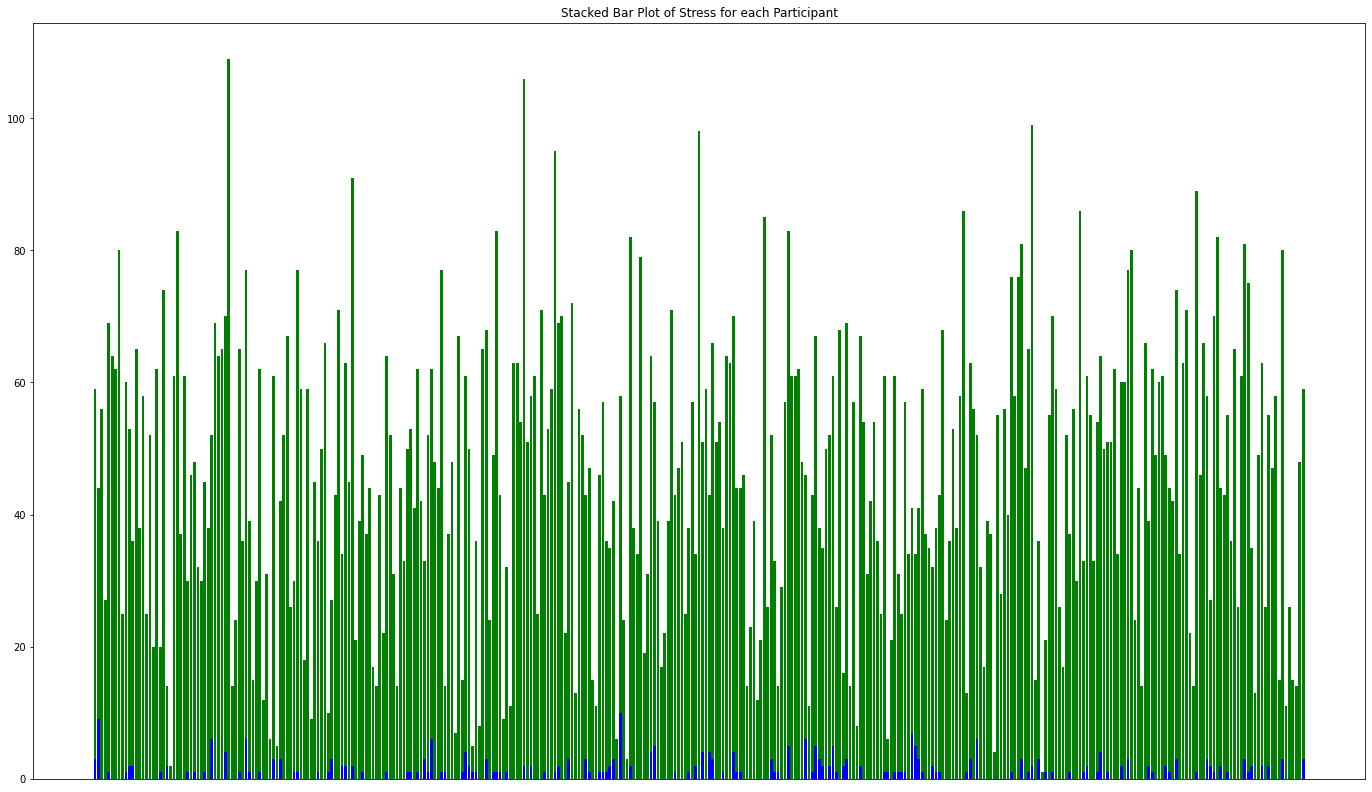

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(stress_ct.index,stress_ct[1], color = "blue") #flip participant name horizontal
ax.bar(stress_ct.index, stress_ct[0], bottom = stress_ct[1], color = "green")
plt.xticks([])
plt.title("Stacked Bar Plot of Stress for each Participant")
plt.show()

In [22]:
#create a count of how many people are stressed based on whether they passed baseline
stress_ct['stress'] = [1 if stress_ct['stress_rate'][i] > baseline else 0 for i in range(len(stress_ct['stress_rate']))]
stress_ppl = len(stress_ct[stress_ct['stress'] == 1])
stress_ppl/len(stress_ct) #33% of our participants are stressed

0.32294617563739375

IndexError: index 10 is out of bounds for axis 0 with size 2

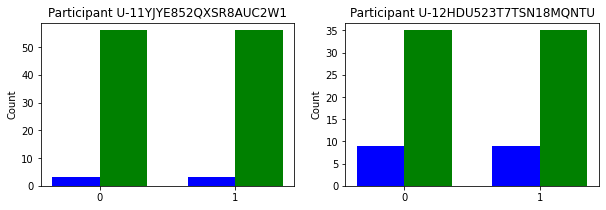

In [23]:
#Further examinations on individuals with high stress
fig, axes = plt.subplots(1,2, figsize=(10,3))
labels = [0, 1]
x = np.arange(len(labels))
width = 0.35
for i, person in list(enumerate(stress_ct['participant_id'])):
    if stress_ct['stress'][i] == 1:
        axes[i].bar(x - width/2, stress_ct[1][i], width,  color = "blue")
        axes[i].bar(x + width/2, stress_ct[0][i], width, color = "green")
        axes[i].set_title('Participant {0}'.format(person))
        axes[i].set_xticks(labels)
        axes[i].set_ylabel('Count')
fig.tight_layout()
fig.show()

In [24]:
#Two Sided Test or Omnibus Test
from scipy import stats


In [25]:
# total_prop_stressed = (sam_df.stress_level == 1).mean()
# has_energy = sam_df[sam_df.energy_level == 1].shape[0]
# no_energy = sam_df[sam_df.energy_level == 0].shape[0]
# #make sure that there are at least 10 data points for each class
# assert has_energy*total_prop_stressed>10, "Assumptions not met"
# assert no_energy*total_prop_stressed>10, "Assumptions not met"
# assert has_energy*(1-total_prop_stressed)>10, "Assumptions not met"
# assert no_energy*(1-total_prop_stressed)>10, "Assumptions not met"
# #ISSUE: Not enough samples for each class :'(

## Logistic Regression

In [26]:
#import data and create final dataset
ace_ptsd = pd.read_csv("/Users/priss/Desktop/evidation_data/stress_classification_ptsd_ace.csv")
merge= sam.merge(ace_ptsd, how = 'inner', on = 'participant_id')
final_data = merge[["participant_id", "stress", "energy", "total_ace", "total_ptsd"]]
final_data

,participant_id,stress,energy,total_ace,total_ptsd
0,U-5C245D4USLA4KUFTXP4F,0,0,2,32
1,U-5C245D4USLA4KUFTXP4F,0,0,2,32
2,U-5C245D4USLA4KUFTXP4F,0,1,2,32
3,U-5C245D4USLA4KUFTXP4F,0,0,2,32
4,U-5C245D4USLA4KUFTXP4F,0,0,2,32
...,...,...,...,...,...
8309,U-UYW2W1LW35V27XH92VTR,0,0,0,22
8310,U-UYW2W1LW35V27XH92VTR,0,1,0,22
8311,U-UYW2W1LW35V27XH92VTR,0,0,0,22
8312,U-UYW2W1LW35V27XH92VTR,0,0,0,22


In [27]:
import statsmodels as sm
import patsy
import statsmodels.formula.api as smf
from sklearn.metrics import (confusion_matrix, accuracy_score, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split

X = final_data.loc[:, final_data.columns != 'stress']
y = final_data['stress']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 10, stratify = X["participant_id"])
# building the model and fitting the data
log_reg = smf.Logit(y_train, X_train).fit()
yhat = log_reg.predict(X_test)  # getting the prediction values
cm = confusion_matrix(y_test, yhat)  # confusion matrix
accuracy = accuracy_score(y_test, yhat)  # gives the accuracy on testing data
log_reg.summary()

ModuleNotFoundError: No module named 'patsy'

## Visualizations

In [ ]:
#Likert Scale Barplot
#https://medium.com/orikami-blog/behind-the-screens-likert-scale-visualization-368557ad72d1
import textwrap
wrapper = textwrap.TextWrapper(width=50)

likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']


In [ ]:
sam